In [1]:
# Установка библиотеки (выполняется один раз)
!pip install telethon

# ИМПОРТ
from telethon.sync import TelegramClient
from telethon import TelegramClient
from telethon.tl.functions.messages import GetHistoryRequest
import pandas as pd
import asyncio

# НАСТРОЙКИ
api_id = 27068396  # твой ID
api_hash = 'fcc19d818af1042c8e9f967f7fd1411e'  # твой hash
phone = '+37060201831'  # твой номер
session_name = 'session_name'  # имя сессии

# КАНАЛЫ (можешь заменить/дополнять)
channels = [
    'Agdchan',
    'readovkanews',
    'medvedev_telegram',
    'warfakes',
    'MariaVladimirovnaZakharova',
    'alexey_pushkov',
    'RKadyrov_95',
    'holmogor_talks',
    'dva_majors',
    'grey_zone',
    'philologist_zov'
]

# СОЗДАЕМ КЛИЕНТ
client = TelegramClient(session_name, api_id, api_hash)


# ПОЛУЧЕНИЕ ПОСТОВ И СОХРАНЕНИЕ
async def get_channel_posts_to_csv(channel_username, max_messages=3000):
    try:
        channel = await client.get_entity(channel_username)
        offset_id = 0
        all_messages = []

        while True:
            history = await client(GetHistoryRequest(
                peer=channel,
                limit=100,
                offset_id=offset_id,
                offset_date=None,
                max_id=0,
                min_id=0,
                add_offset=0,
                hash=0
            ))

            messages = history.messages
            if not messages:
                break

            for message in messages:
                if message.message:  # только если есть текст
                    all_messages.append({
                        'id': message.id,
                        'date': message.date.strftime('%Y-%m-%d %H:%M:%S') if message.date else '',
                        'text': message.message,
                        'channel': channel_username
                    })

            offset_id = messages[-1].id

            if len(all_messages) >= max_messages:
                break

        df = pd.DataFrame(all_messages)
        csv_filename = f'{channel_username}.csv'
        jsonl_filename = f'{channel_username}.jsonl'

        df.to_csv(csv_filename, index=False, encoding='utf-8-sig')

        # Сохраняем в jsonl
        df[['text']].dropna().to_json(jsonl_filename, orient='records', lines=True, force_ascii=False)

        print(f"Сохранено {len(df)} сообщений из @{channel_username} в {csv_filename} и {jsonl_filename}")
    except Exception as e:
        print(f"Ошибка при обработке @{channel_username}: {e}")


# ОСНОВНАЯ ФУНКЦИЯ
async def main():
    await client.start(phone)
    print("Успешно подключено!\n")
    for channel in channels:
        await get_channel_posts_to_csv(channel, max_messages=3000)


# ЗАПУСК
await main()

Signed in successfully as Yuri Trkv; remember to not break the ToS or you will risk an account ban!
Успешно подключено!

Сохранено 3027 сообщений из @Agdchan в Agdchan.csv и Agdchan.jsonl
Сохранено 3042 сообщений из @readovkanews в readovkanews.csv и readovkanews.jsonl
Сохранено 532 сообщений из @medvedev_telegram в medvedev_telegram.csv и medvedev_telegram.jsonl
Сохранено 3033 сообщений из @warfakes в warfakes.csv и warfakes.jsonl
Сохранено 3023 сообщений из @MariaVladimirovnaZakharova в MariaVladimirovnaZakharova.csv и MariaVladimirovnaZakharova.jsonl
Сохранено 3018 сообщений из @alexey_pushkov в alexey_pushkov.csv и alexey_pushkov.jsonl
Сохранено 3048 сообщений из @RKadyrov_95 в RKadyrov_95.csv и RKadyrov_95.jsonl
Сохранено 3068 сообщений из @holmogor_talks в holmogor_talks.csv и holmogor_talks.jsonl
Сохранено 3034 сообщений из @dva_majors в dva_majors.csv и dva_majors.jsonl
Ошибка при обработке @grey_zone: "None of [Index(['text'], dtype='object')] are in the [columns]"
Сохранено 1

In [2]:
import pandas as pd
import glob
import os

# Ищем все .csv в текущей папке
csv_files = glob.glob("*.csv")

# Фильтруем пустые файлы (на всякий случай)
valid_files = [f for f in csv_files if os.path.getsize(f) > 0]

# Загружаем все файлы
df_list = []
for file in valid_files:
    try:
        df = pd.read_csv(file)
        if not df.empty:
            df_list.append(df)
    except Exception as e:
        print(f"Не удалось прочитать файл {file}: {e}")

# Объединяем
merged_df = pd.concat(df_list, ignore_index=True)

# Сохраняем в merged.csv
merged_df.to_csv('merged.csv', index=False, encoding='utf-8-sig')

# Сохраняем в merged.jsonl — только нужные поля
merged_df[['text', 'channel', 'date']].dropna().to_json('merged.jsonl', orient='records', lines=True, force_ascii=False)

print(f"Объединено {len(merged_df)} сообщений из {len(valid_files)} файлов.")

Не удалось прочитать файл grey_zone.csv: No columns to parse from file
Объединено 26824 сообщений из 11 файлов.


In [8]:
pip install pandas tqdm emoji regex

  Using cached numpy-2.2.5-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.5-cp312-cp312-win_amd64.whl (12.6 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datashader 0.16.3 requires scipy, which is not installed.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, which is not installed.
imbalanced-learn 0.12.3 requires scipy>=1.5.0, which is not installed.
scikit-image 0.24.0 requires scipy>=1.9, which is not installed.
scikit-learn 1.5.1 requires scipy>=1.6.0, which is not installed.
statsmodels 0.14.2 requires scipy!=1.9.2,>=1.8, which is not installed.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.5 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.


In [10]:
import pandas as pd
import emoji
import re
from tqdm.notebook import tqdm
import os

# Указать путь к файлу: 'merged.csv' или 'merged.jsonl'
INPUT_FILE = "merged.csv"

# Автоматически определить формат
file_ext = os.path.splitext(INPUT_FILE)[-1].lower()

# Загрузка файла
if file_ext == ".csv":
    df = pd.read_csv(INPUT_FILE)
elif file_ext == ".jsonl":
    df = pd.read_json(INPUT_FILE, lines=True)
else:
    raise ValueError("Поддерживаются только .csv и .jsonl файлы")

# Очистка текста
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = emoji.replace_emoji(text, replace="")  # удалить эмодзи
    text = re.sub(r"http\S+|www\S+", "", text)    # удалить ссылки
    text = re.sub(r"[^\w\s]", "", text)           # удалить пунктуацию
    text = re.sub(r"\s+", " ", text)              # сократить пробелы
    return text.strip()

# Применение очистки
tqdm.pandas()
df["clean_text"] = df["text"].progress_apply(clean_text)
df["tokens"] = df["clean_text"].apply(lambda x: x.lower().split())

# Удаление дублей и пустых строк
df = df.drop_duplicates(subset="clean_text")
df = df[df["clean_text"].str.strip() != ""]

# Сохранение результата
df.to_csv("cleaned_merged.csv", index=False)
df.to_json("cleaned_merged.jsonl", orient="records", lines=True)

print("✅ Готово! Файлы сохранены как cleaned_merged.csv и cleaned_merged.jsonl")

  0%|          | 0/26824 [00:00<?, ?it/s]

✅ Готово! Файлы сохранены как cleaned_merged.csv и cleaned_merged.jsonl


C:\Users\yuter\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\yuter\.cache\huggingface\hub\models--sentence-transformers--paraphrase-multilingual-MiniLM-L12-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.wa

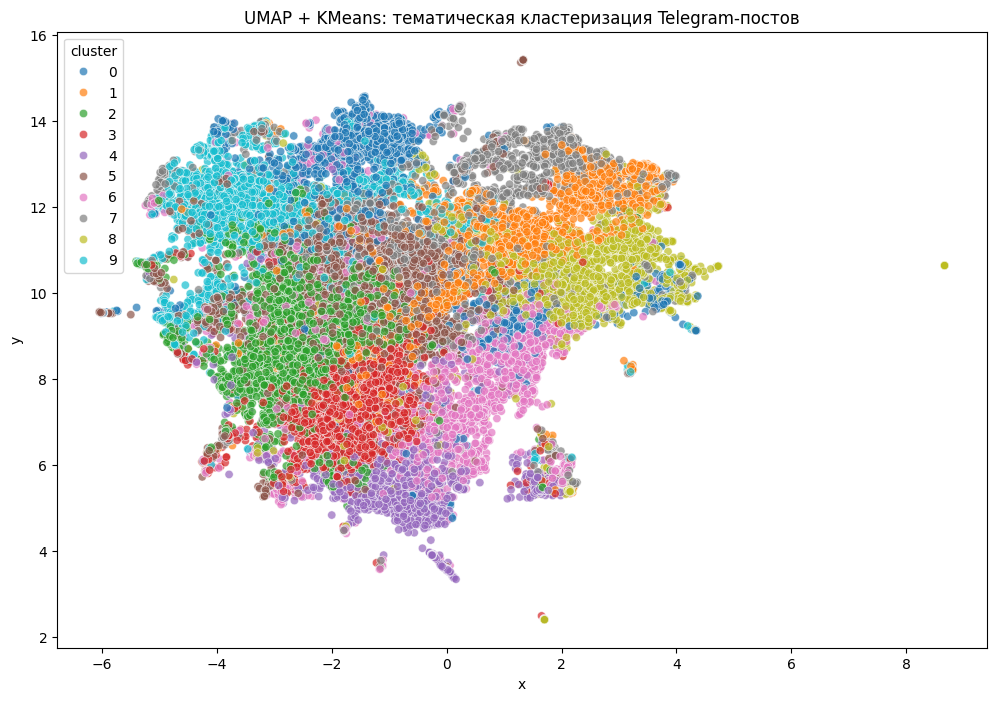


--- Кластер 0 ---
1. #плакат Скачать...

2. Ютьюба нет, смотрите  paideuma.tv...

3. Всех с Благовещением 🕊️Самым таинственным и открывающим завесу тайны мироздания праздником!...


--- Кластер 1 ---
1. Херсонское направление

Красиво запечатленное уничтожение вражеских БПЛА с помощью FPV-дронов. 

Работа операторов БПЛА 61-й отдельной гвардейской Киркенесской Краснознамённой бригады морской пехоты.

Два майора...

2. Фейк: ВСУ уничтожили паромную переправу в Крыму, сорвав российскую логистику на полуострове. Об этом пишут украинские СМИ со ссылкой на британскую разведку. 

Правда: В конце мая два парома получили повреждения от падения обломков ракет, сбитых при отражении атаки ВСУ, но сама Керченская переправа н...

3. Фейк: Российские стратегические бомбардировщики Ту-95МС давно устарели и выработали свой ресурс до такой степени, что их экипажи боятся взять на борт больше одной ракеты при возможности брать восемь. Об этом пишут украинские СМИ.

Правда: С Ту-95 МС все в порядке, прос

In [5]:
# 1. Импорты и конфигурация
import pandas as pd
import numpy as np
from tqdm import tqdm
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Загрузка данных
df = pd.read_csv("cleaned_merged.csv")  # замените на актуальный путь
texts = df["text"].dropna().tolist()

# 3. Эмбеддинг с Sentence-BERT
model = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")
embeddings = model.encode(texts, show_progress_bar=True)

# 4. UMAP для понижения размерности
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric="cosine", random_state=42)
embedding_2d = reducer.fit_transform(embeddings)

# 5. Кластеризация (KMeans)
n_clusters = 10  # можно будет варьировать
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df["cluster"] = kmeans.fit_predict(embeddings)
df["x"] = embedding_2d[:, 0]
df["y"] = embedding_2d[:, 1]

# 6. Визуализация кластеров
plt.figure(figsize=(12, 8))
sns.scatterplot(x="x", y="y", hue="cluster", data=df, palette="tab10", alpha=0.7)
plt.title("UMAP + KMeans: тематическая кластеризация Telegram-постов")
plt.show()

# 7. Просмотр содержимого кластеров (по 3 примера из каждого)
for cluster_id in sorted(df["cluster"].unique()):
    print(f"\n--- Кластер {cluster_id} ---")
    sample = df[df["cluster"] == cluster_id]["text"].sample(3, random_state=42)
    for i, text in enumerate(sample, 1):
        print(f"{i}. {text[:300]}...\n")

# 8. (Опционально) Сохранить результаты
df.to_csv("embedded_clustered.csv", index=False)


In [1]:
import pandas as pd

# Загрузим CSV-файл, который у тебя уже есть
df = pd.read_csv("embedded_clustered.csv")

# Посмотрим, какие кластеры есть
print("Список кластеров:", df["cluster"].unique())


Список кластеров: [6 3 9 4 8 1 0 2 5 7]


In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Загружаем данные (если ещё не загружены)
df = pd.read_csv("embedded_clustered.csv")

# Подготовим кластеры
clusters = df["cluster"].unique()

# Результат сюда
top_n = 15
tfidf_results = {}

for cluster in clusters:
    texts = df[df["cluster"] == cluster]["text"].astype(str).tolist()
    vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, max_features=1000)
    tfidf_matrix = vectorizer.fit_transform(texts)
    tfidf_scores = tfidf_matrix.sum(axis=0).A1
    terms = vectorizer.get_feature_names_out()

    top_indices = tfidf_scores.argsort()[::-1][:top_n]
    top_terms = [(terms[i], tfidf_scores[i]) for i in top_indices]
    tfidf_results[cluster] = top_terms

# Выводим ключевые слова по каждому кластеру
for cluster, terms in tfidf_results.items():
    print(f"\nКластер {cluster}:")
    for term, score in terms:
        print(f"{term} ({score:.2f})")



Кластер 6:
не (247.08)
на (228.80)
что (182.27)
это (152.87)
как (123.52)
по (113.55)
то (112.12)
но (104.54)
за (93.47)
из (91.04)
для (88.35)
https (85.95)
от (84.75)
все (83.29)
мы (78.38)

Кластер 3:
на (278.81)
не (241.74)
что (197.98)
по (127.64)
это (124.99)
как (110.21)
для (109.35)
сша (105.16)
украины (103.05)
за (96.04)
из (92.07)
от (88.72)
но (87.20)
нато (86.19)
украине (85.22)

Кластер 9:
на (213.05)
россии (137.88)
по (131.77)
что (116.16)
за (115.63)
для (101.24)
не (101.10)
из (97.24)
чр (92.98)
мы (92.81)
его (83.33)
от (81.51)
это (80.02)
он (77.09)
также (75.56)

Кластер 4:
на (140.98)
не (130.65)
что (116.87)
сша (113.10)
по (79.59)
трампа (78.23)
https (76.09)
это (74.19)
трамп (69.78)
как (65.04)
он (59.35)
его (57.50)
за (56.08)
но (53.63)
из (52.61)

Кластер 8:
на (278.86)
не (206.16)
что (153.08)
по (146.65)
для (124.89)
два (124.07)
майора (120.76)
это (102.57)
как (99.45)
из (96.82)
но (91.33)
за (89.95)
от (87.92)
то (81.67)
противника (78.49)

Кластер 1:

In [8]:
!pip install nltk


In [12]:
import sys
!{sys.executable} -m pip install nltk


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 13.2 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [click]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ---

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [13]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

russian_stopwords = stopwords.words("russian")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yuter\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Загружаем данные (если ещё не загружены)
df = pd.read_csv("embedded_clustered.csv")

# Подготовим кластеры
clusters = df["cluster"].unique()

# Результат сюда
top_n = 15
tfidf_results = {}

# Анализ по каждому кластеру
for cluster in clusters:
    texts = df[df["cluster"] == cluster]["text"].astype(str).tolist()
    vectorizer = TfidfVectorizer(
        max_df=0.9,
        min_df=2,
        stop_words=russian_stopwords,  # вот тут применяем русский список
        max_features=1000
    )
    tfidf_matrix = vectorizer.fit_transform(texts)
    tfidf_scores = tfidf_matrix.sum(axis=0).A1
    terms = vectorizer.get_feature_names_out()

    top_indices = tfidf_scores.argsort()[::-1][:top_n]
    top_terms = [(terms[i], tfidf_scores[i]) for i in top_indices]
    tfidf_results[cluster] = top_terms

# Выводим ключевые слова по каждому кластеру
for cluster, terms in tfidf_results.items():
    print(f"\nКластер {cluster}:")
    for term, score in terms:
        print(f"{term} ({score:.2f})")



Кластер 6:
это (183.81)
https (96.13)
me (82.53)
сша (69.35)
всё (51.36)
просто (51.17)
очень (50.90)
которые (48.24)
ещё (43.42)
вообще (42.03)
против (41.67)
время (41.61)
нам (40.86)
именно (39.33)
года (39.00)

Кластер 3:
это (143.70)
сша (116.91)
украины (115.91)
нато (96.06)
украине (95.38)
https (80.17)
россии (77.97)
ес (75.75)
me (67.95)
украина (64.47)
страны (60.26)
украину (58.94)
германии (57.46)
войну (52.90)
которые (51.68)

Кластер 9:
россии (148.00)
чр (97.55)
это (89.69)
также (80.23)
республики (73.92)
хаджи (71.09)
рф (68.14)
сегодня (64.88)
президента (64.07)
чеченской (62.34)
кадырова (59.59)
нашей (58.98)
очень (55.47)
ахмат (54.62)
мид (53.93)

Кластер 4:
сша (126.67)
трампа (87.95)
это (86.37)
https (81.51)
трамп (79.62)
me (49.31)
байдена (44.02)
харрис (40.21)
ru (35.55)
байден (34.47)
против (33.54)
com (30.93)
президента (29.83)
года (29.82)
заявил (28.80)

Кластер 8:
майора (129.94)
это (121.74)
противника (85.74)
ахмат (64.86)
наши (62.59)
бпла (60.16)
h

In [16]:
pip install bertopic

   ---------------------------------------- 0.0/730.9 kB ? eta -:--:--
   --------------------------------------- 730.9/730.9 kB 10.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ------ --------------------------------- 2.4/14.8 MB 13.4 MB/s eta 0:00:01
   ------------- -------------------------- 5.0/14.8 MB 12.6 MB/s eta 0:00:01
   -------------------- ------------------- 7.6/14.8 MB 12.7 MB/s eta 0:00:01
   -------------------------- ------------- 9.7/14.8 MB 12.1 MB/s eta 0:00:01
   --------------------------------- ------ 12.6/14.8 MB 12.3 MB/s eta 0:00:01
   ---------------------------------------- 14.8/14.8 MB 12.1 MB/s eta 0:00:00

   ---------------------------------------- 0/4 [narwhals]
   ---------------------------------------- 0/4 [narwhals]
   ---------------------------------------- 0/4 [narwhals]
   ---------------------------------------- 0/4 [narwhals]
   ---------------------------------------- 0/4 [narwhals]
   ----------

In [19]:
from bertopic import BERTopic
import pandas as pd

# 1. Загрузка данных (после кластеризации)
df = pd.read_csv("embedded_clustered.csv")  # Файл с кластерами
texts = df["text"].dropna().tolist()

# 2. Создание объекта BERTopic
topic_model = BERTopic(language="multilingual")  # Автоматическое определение языка

# 3. Анализ тем для каждого кластера
cluster_topics = {}
for cluster_id in sorted(df["cluster"].unique()):
    print(f"\n=== Анализ тем для кластера {cluster_id} ===")

    # Выбираем только посты из данного кластера
    cluster_texts = df[df["cluster"] == cluster_id]["text"].tolist()

    # Запускаем BERTopic
    topics, _ = topic_model.fit_transform(cluster_texts)

    # Добавляем темы в DataFrame
    df.loc[df["cluster"] == cluster_id, "topic"] = topics

    # Сохраняем полученные темы
    cluster_topics[cluster_id] = topic_model.get_topic_info()

    print(cluster_topics[cluster_id])  # Выводим найденные темы

# 4. Визуализация тем (общая картина)
topic_model.visualize_topics()

# 5. Сохранение результатов
df.to_csv("bertopic_clustered_results.csv", index=False)



=== Анализ тем для кластера 0 ===
    Topic  Count                                        Name  \
0      -1   1250                            -1_не_на_что_это   
1       0    124                      0_канал_на_holmobot_не   
2       1     88                         1_так_всё_это_очень   
3       2     56                         2_фильм_на_не_видео   
4       3     54    3_майора_два_непокорённая_документальный   
5       4     48                 4_песня_подъём_песни_музыка   
6       5     46                    5_радио_эфир_paideuma_tv   
7       6     44                             6_не_что_вот_то   
8       7     43                  7_me_https_bbbreaking_сама   
9       8     42             8_аллаха_месяц_всевышнего_аллах   
10      9     38                            9_ее_не_даша_это   
11     10     34                10_майора_два_моисей_курская   
12     11     32                      11_день_праздник_на_не   
13     12     30                       12_https_video_com_ru   
14   

In [27]:
import pandas as pd
from bertopic import BERTopic
import matplotlib.pyplot as plt

# 1. Загружаем данные после кластеризации
df = pd.read_csv("embedded_clustered.csv")
texts = df["text"].dropna().tolist()

# 2. Инициализация модели BERTopic
topic_model = BERTopic(language="multilingual")

# 3. Анализ тем для каждого кластера
cluster_topics = {}
for cluster_id in sorted(df["cluster"].unique()):
    print(f"\n=== Анализ тем для кластера {cluster_id} ===")

    # Выбираем посты только из данного кластера
    cluster_texts = df[df["cluster"] == cluster_id]["text"].tolist()

    # Запускаем BERTopic
    topics, _ = topic_model.fit_transform(cluster_texts)
    df.loc[df["cluster"] == cluster_id, "topic"] = topics

    # Сохраняем найденные темы
    cluster_topics[cluster_id] = topic_model.get_topic_info()

    print(cluster_topics[cluster_id])  # Выводим основные темы

# 4. Фильтруем неразмеченные посты (-1.0 означает "нет темы")
filtered_df = df[df["topic"] != -1.0]

# 5. Статистика по темам
topic_distribution = filtered_df.groupby(["cluster", "topic"]).size().reset_index(name="count")
print(topic_distribution.sort_values(by=["cluster", "count"], ascending=False))

# 6. Визуализация тем
topic_model.visualize_topics()
topic_model.visualize_hierarchy()
plt.show()

# 7. Сохранение результата в CSV
filtered_df.to_csv("bertopic_clustered_results.csv", index=False)



=== Анализ тем для кластера 0 ===
    Topic  Count                                          Name  \
0      -1   1079                              -1_на_не_что_это   
1       0    159                               0_не_что_на_вот   
2       1    131                        1_канал_на_holmobot_не   
3       2    102                          2_не_день_христос_на   
4       3     96                          3_так_это_все_именно   
5       4     77             4_аллаха_всевышнего_аллах_пророка   
6       5     65                  5_день_любви_праздником_мама   
7       6     48                      6_paideuma_tv_радио_эфир   
8       7     46  7_непокорённая_анастасии_документальный_лете   
9       8     45                               8_не_ее_что_это   
10      9     39                      9_глава_вода_воды_гегеля   
11     10     35                  10_майора_два_моисей_курская   
12     11     34                         11_фильм_фильма_на_4к   
13     12     30                         

In [3]:
!pip install numba --upgrade

   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.8 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.8 MB 577.4 kB/s eta 0:00:04
   ------- -------------------------------- 0.5/2.8 MB 577.4 kB/s eta 0:00:04
   ----------- ---------------------------- 0.8/2.8 MB 599.2 kB/s eta 0:00:04
   ----------- ---------------------------- 0.8/2.8 MB 599.2 kB/s eta 0:00:04
   -------------- ------------------------- 1.0/2.8 MB 565.4 kB/s eta 0:00:04
   -------------- ------------------------- 1.0/2.8 MB 565.4 kB/s eta 0:00:04
   ------------------ --------------------- 1.3/2.8 MB 599.2 kB/s eta 0:00:03
   ------------------ --------------------- 1.3/2.8 MB 599.2 kB/s eta 0:00:03
   ---------------------- ----------------- 1.6/2.8 MB 599.0 kB/s eta 0:00:03
   -------------------

In [19]:
import sys
print(sys.executable)

C:\Users\yuter\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe


In [6]:
import nltk
print(nltk.data.find("tokenizers/punkt"))

C:\Users\yuter\AppData\Roaming\nltk_data\tokenizers\punkt


In [8]:
import nltk

nltk.data.path.append(r"C:\Users\yuter\AppData\Roaming\nltk_data")

In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yuter\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yuter\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yuter\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
pip install nltk --no-cache-dir

Note: you may need to restart the kernel to use updated packages.


In [5]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
print("✅ Все ресурсы NLTK загружены успешно!")

✅ Все ресурсы NLTK загружены успешно!


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yuter\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yuter\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
import spacy

nlp = spacy.load("ru_core_news_md")
print("✅ Русская модель успешно загружена!")

✅ Русская модель успешно загружена!


In [15]:
import re
import spacy
from nltk.corpus import stopwords

nlp = spacy.load("ru_core_news_md")
stop_words = set(stopwords.words("russian"))

def clean_text(text: str) -> str:
    """Очищает текст: удаляет лишнее и приводит к нормальной форме."""
    text = text.lower()  # Приводим к нижнему регистру
    text = re.sub(r"http\S+|www\S+|@\w+|\d+", "", text)  # Удаляем ссылки, упоминания, цифры
    text = re.sub(r"[^\w\s]", "", text)  # Удаляем пунктуацию

    doc = nlp(text)  # Обрабатываем текст в spacy

    words = [token.lemma_ for token in doc if token.text not in stop_words and token.pos_ in {"NOUN", "ADJ"}]  # Лемматизация + фильтр
    return " ".join(words)

# Тест:
example_text = "⚡️В срочном порядке! ВСУ атаковали мирных жителей в Донецке! 📢 Смотрите видео здесь: https://t.me/example"
print(clean_text(example_text))

срочный порядок мирный житель видео


In [16]:
import pandas as pd

df = pd.read_csv("bertopic_clustered_results.csv")
df["clean_text"] = df["text"].apply(clean_text)
df.to_csv("cleaned_bertopic_results.csv", index=False)

print("✅ Файл сохранен: cleaned_bertopic_results.csv!")

✅ Файл сохранен: cleaned_bertopic_results.csv!


In [19]:
import spacy
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

nlp = spacy.load("ru_core_news_md")

def extract_relevant_pairs(text, target_words):
    """Извлекает пары существительных и прилагательных, связанных с целевыми словами."""
    doc = nlp(str(text))  # Преобразуем в строку, чтобы избежать NaN-ошибки
    return [(token.text, token.head.text) for token in doc if token.pos_ in {"ADJ", "NOUN"} and token.head.text in target_words]

# Загружаем очищенный датасет
df = pd.read_csv("cleaned_bertopic_results.csv")

# Убираем пустые строки
df = df.dropna(subset=["clean_text"])

# **ВВЕДИ СВОИ ЦЕЛЕВЫЕ СЛОВА** 👇
target_words = {"русский", "Россия", "народ"}  # ← Можно изменить!

# Применяем фильтрацию
df["word_pairs"] = df["clean_text"].apply(lambda text: extract_relevant_pairs(text, target_words))

print("✅ Данные отфильтрованы для целевых слов!")

✅ Данные отфильтрованы для целевых слов!


In [24]:
import spacy
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nlp = spacy.load("ru_core_news_md")

def extract_noun_adj_pairs(text, target_word):
    """Извлекает существительные и прилагательные, связанные с конкретным целевым словом."""
    doc = nlp(str(text))  # Преобразуем в строку, чтобы избежать ошибок с NaN
    noun_pairs = []
    adj_pairs = []

    for token in doc:
        if token.pos_ == "NOUN" and token.head.text == target_word:
            noun_pairs.append(token.text)  # Существительное, связанное с целевым словом
        if token.pos_ == "ADJ" and token.head.text == target_word:
            adj_pairs.append(token.text)  # Прилагательное, связанное с целевым словом

    return noun_pairs, adj_pairs

# Загружаем обработанные данные
df = pd.read_csv("cleaned_bertopic_results.csv")

# Убираем пустые строки
df = df.dropna(subset=["clean_text"])

# **Задаём целевые слова**
target_words = ["русский", "Россия", "народ", "Запад"]

# Создаём отдельные колонки с существительными и прилагательными для каждого целевого слова
for target_word in target_words:
    df[f"nouns_{target_word}"], df[f"adjs_{target_word}"] = zip(*df["clean_text"].apply(lambda text: extract_noun_adj_pairs(text, target_word)))

print("✅ Данные отфильтрованы для каждого целевого слова!")

✅ Данные отфильтрованы для каждого целевого слова!


✅ Данные отфильтрованы для каждого целевого слова!


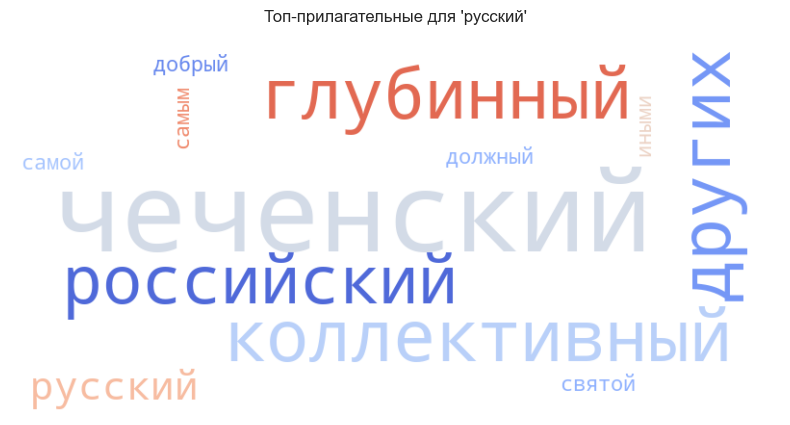

⚠️ Нет данных для 'Топ-прилагательные для 'россия'', пропускаем...


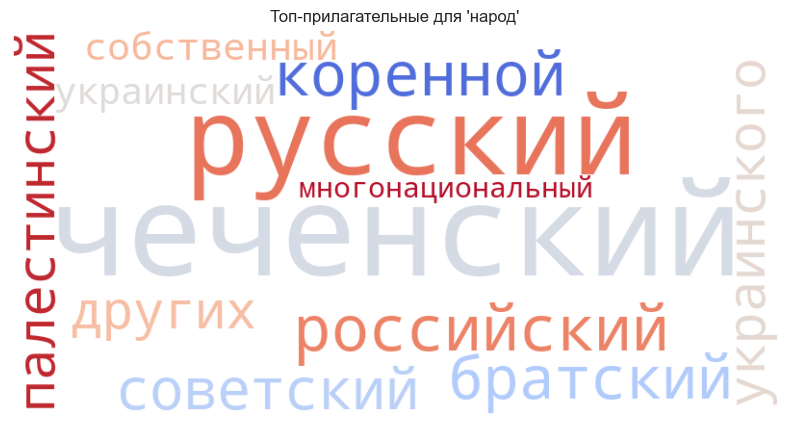

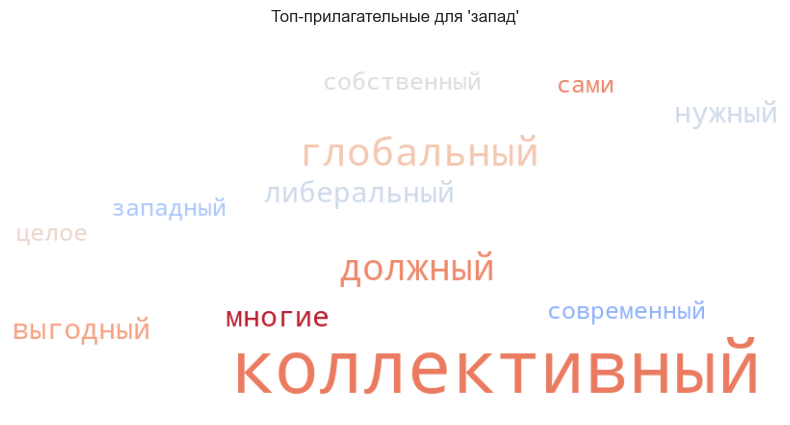

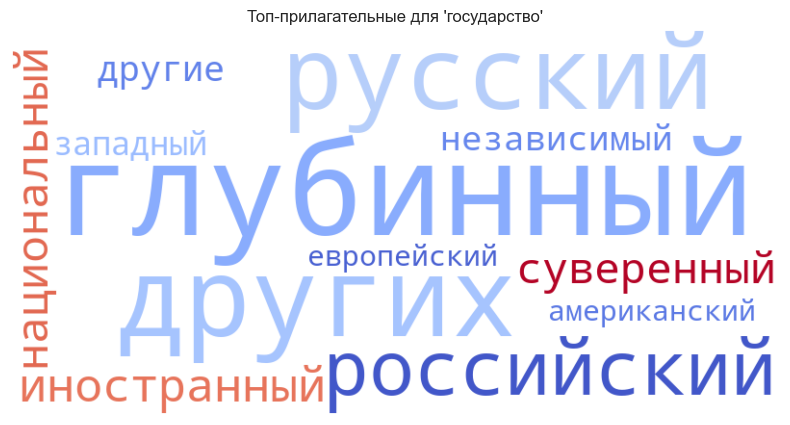

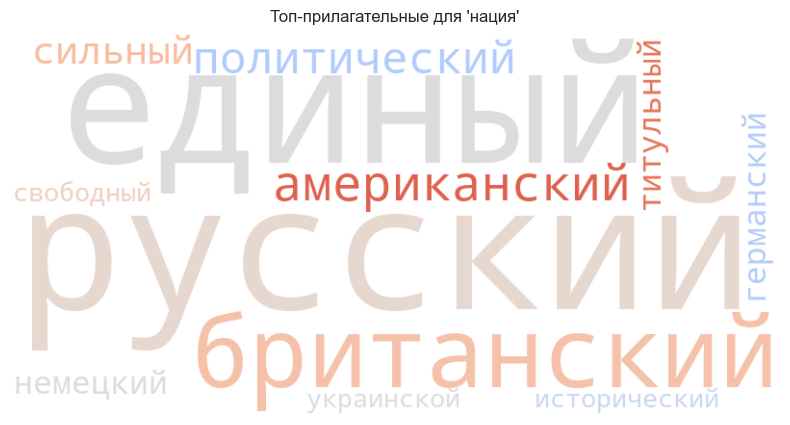

In [29]:
import spacy
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nlp = spacy.load("ru_core_news_md")

# Список стоп-слов для фильтрации бесполезных прилагательных
STOPWORDS_ADJ = {"самый", "самые", "самое", "самых", "этот", "тот", "любой", "весь", "такой", "наш", "их", "мой", "твой"}

def extract_adj_pairs(text, target_word):
    """Извлекает прилагательные, связанные с целевым словом, с фильтрацией"""
    doc = nlp(str(text))
    adj_pairs = []

    for token in doc:
        if token.pos_ == "ADJ" and token.head.text == target_word and token.text not in STOPWORDS_ADJ:
            adj_pairs.append(token.text)

    return adj_pairs

# Загружаем обработанные данные
df = pd.read_csv("cleaned_bertopic_results.csv")

# Убираем пустые строки
df = df.dropna(subset=["clean_text"])

# **Задаём целевые слова**
target_words = ["русский", "россия", "народ", "запад", "государство", "нация"]

# Создаём отдельные колонки с прилагательными для каждого целевого слова
for target_word in target_words:
    df[f"adjs_{target_word}"] = df["clean_text"].apply(lambda text: extract_adj_pairs(text, target_word))

print("✅ Данные отфильтрованы для каждого целевого слова!")

# Глобальный список всех прилагательных (для замещения, если мало данных)
all_adjs = pd.concat([df[f"adjs_{word}"].explode().dropna() for word in target_words]).tolist()
global_adj_freq = Counter(all_adjs).most_common(50)  # 50 самых частых

def generate_compact_wordcloud(word_list, title, top_n=12):
    """Создаёт компактное облако слов, гарантируя 12 топ-слов"""
    if not word_list:  # Если список пуст, пропускаем
        print(f"⚠️ Нет данных для '{title}', пропускаем...")
        return

    # Подсчитываем частотность
    word_counts = Counter(word_list).most_common(top_n)

    # Если после фильтрации меньше 12 слов, добавляем частые слова из глобального списка
    while len(word_counts) < top_n and global_adj_freq:
        next_word = global_adj_freq.pop(0)  # Берём следующее частотное слово
        if next_word[0] not in word_list:
            word_counts.append(next_word)

    word_freq_dict = dict(word_counts)  # Преобразуем в словарь

    # Генерируем WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color="white",
                          colormap="coolwarm", max_words=top_n).generate_from_frequencies(word_freq_dict)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

# Генерируем WordClouds только для прилагательных (без существительных)
for target_word in target_words:
    adjs = df[f"adjs_{target_word}"].explode().dropna().tolist()
    generate_compact_wordcloud(adjs, f"Топ-прилагательные для '{target_word}'", top_n=12)

In [31]:
from transformers import AutoModel

model_name = "QCRI/PropagandaTechniquesAnalysis-en-BERT"
try:
    model = AutoModel.from_pretrained(model_name)
    print("✅ Модель загружена успешно!")
except Exception as e:
    print(f"❌ Ошибка: {e}")

✅ Модель загружена успешно!


In [36]:
from transformers import AutoTokenizer

model_name = "facebook/bart-large-mnli"  # ← Попробуй другие модели
tokenizer = AutoTokenizer.from_pretrained(model_name)
print("✅ Tokenizer загружен успешно!")

C:\Users\yuter\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\yuter\.cache\huggingface\hub\models--facebook--bart-large-mnli. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


✅ Tokenizer загружен успешно!


In [37]:
pipe = pipeline("text-classification", model="DeepPavlov/rubert-base-cased")  # Русский BERT

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cpu


In [2]:
import pandas as pd

# Загружаем данные
df = pd.read_csv("cleaned_bertopic_results.csv")

# Проверяем, загружены ли данные корректно
print(df.head())
print(df.info())  # Посмотрим, какие колонки есть в датасете

      id                 date  \
0  21464  2025-05-08 05:34:26   
1  21458  2025-05-07 12:28:38   
2  21454  2025-05-07 08:42:20   
3  21450  2025-05-06 21:44:56   
4  21448  2025-05-06 21:26:51   

                                                text  channel  \
0  Великая Отечественная Война не закончилась в 1...  Agdchan   
1  🇫🇷 Эммануэль Макрон выступил с речью перед Вел...  Agdchan   
2  К.В.Малофеев: "Западу не страшны Индия и Пакис...  Agdchan   
3  Макрон в своей речи перед масонами Великой лож...  Agdchan   
4  Тем временем Макрон выступил перед масонами Ве...  Agdchan   

                                          clean_text  \
0  великий отечественный война год конец плод тру...   
1  речь великий масонский ложа тысяча человек сво...   
2  квмалофеев запад страшный ядерный война страшн...   
3  макрон речь масон великий ложа проект тёмный п...   
4  время масон великий ложа шотландский обряд либ...   

                                              tokens  cluster         x  

In [4]:
import os
os.environ["GIT_PYTHON_GIT_EXECUTABLE"] = "C:\\Program Files\\Git\\bin\\git.exe"

In [2]:
from datasets import load_dataset

# Загружаем датасет с Hugging Face
dataset = load_dataset("benmshultz/RuFal_fallacy_detection")

print(dataset)

Repo card metadata block was not found. Setting CardData to empty.
Generating test split: 100%|██████████| 105/105 [00:00<00:00, 8745.77 examples/s]

DatasetDict({
    train: Dataset({
        features: ['labels', 'text'],
        num_rows: 595
    })
    test: Dataset({
        features: ['labels', 'text'],
        num_rows: 105
    })
})


In [3]:
print(dataset)
print(dataset.column_names)
print(dataset["train"][0])  # Выведем первый пример из train

DatasetDict({
    train: Dataset({
        features: ['labels', 'text'],
        num_rows: 595
    })
    test: Dataset({
        features: ['labels', 'text'],
        num_rows: 105
    })
})
{'train': ['labels', 'text'], 'test': ['labels', 'text']}
{'labels': 'ad hominem', 'text': 'Countries need to stop weaponising energy to settle political scores, as EU did for many years, incl with NordStream. It is important to remove discriminatory & artificial barriers from world energy markets, start honest dialogue between energy suppliers & consumers.'}


In [7]:
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments

# Загружаем токенизатор и модель
tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")
model = AutoModelForSequenceClassification.from_pretrained("DeepPavlov/rubert-base-cased", num_labels=len(set(dataset["train"]["labels"])))

# Оставляем только текст и его логическую ошибку
train_dataset = dataset["train"].map(lambda x: {"text": x["text"], "label": x["labels"]}, batched=True)
test_dataset = dataset["test"].map(lambda x: {"text": x["text"], "label": x["labels"]}, batched=True)

def tokenize_function(example):
    return tokenizer(example["text"], padding="max_length", truncation=True, max_length=512)

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Map: 100%|██████████| 105/105 [00:00<00:00, 2560.97 examples/s]


In [25]:
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments

# 📌 1. Загружаем токенизатор и модель
tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")

# 📌 2. Создаём список всех уникальных меток и словарь преобразования
label_list = sorted(set(label for labels in dataset["train"]["labels"] for label in (labels if isinstance(labels, list) else [labels])))
label_to_id = {label: i for i, label in enumerate(label_list)}  # Создаём словарь соответствий

# 📌 3. Загружаем модель с учётом многоклассовой классификации
model = AutoModelForSequenceClassification.from_pretrained(
    "DeepPavlov/rubert-base-cased",
    num_labels=len(label_list)  # Указываем количество классов
)

# 📌 4. Функция токенизации + преобразование списка меток в индексы
def preprocess_function(example):
    return {
        **tokenizer(example["text"], padding="max_length", truncation=True, max_length=512),
        "labels": [label_to_id[label] for label in example["labels"]]  # Преобразуем метки в индексы
    }

# 📌 5. Обрабатываем датасет
train_dataset = dataset["train"].map(preprocess_function, batched=True)
test_dataset = dataset["test"].map(preprocess_function, batched=True)

# 📌 6. Настройки тренировки
training_args = TrainingArguments(
    output_dir="./fallacy_bert",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01
)

# 📌 7. Запуск тренировки
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

trainer.train()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Map: 100%|██████████| 105/105 [00:00<00:00, 2792.76 examples/s]
C:\Users\yuter\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss


C:\Users\yuter\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\yuter\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


TrainOutput(global_step=225, training_loss=2.075086669921875, metrics={'train_runtime': 4624.5136, 'train_samples_per_second': 0.386, 'train_steps_per_second': 0.049, 'total_flos': 469699618913280.0, 'train_loss': 2.075086669921875, 'epoch': 3.0})

In [26]:
metrics = trainer.evaluate()
print(metrics)

C:\Users\yuter\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


{'eval_loss': 2.184091806411743, 'eval_runtime': 45.6763, 'eval_samples_per_second': 2.299, 'eval_steps_per_second': 0.307, 'epoch': 3.0}


In [28]:
trainer.save_model("./fallacy_bert")  # Сохраняем модель

In [30]:
import os

print(os.listdir("./fallacy_bert"))

['checkpoint-150', 'checkpoint-225', 'checkpoint-75', 'config.json', 'model.safetensors', 'training_args.bin']


In [32]:
import psutil

for proc in psutil.process_iter(['pid', 'name']):
    try:
        for item in proc.open_files():
            if './fallacy_bert' in item.path:
                print(f"Процесс {proc.info['name']} (PID: {proc.info['pid']}) использует файл {item.path}")
    except psutil.AccessDenied:
        pass

In [1]:
from transformers import pipeline

# Загружаем обученную модель
pipe = pipeline("text-classification", model="./fallacy_bert")

# Тексты для анализа
texts = [
    "Этот политик использует эмоциональные аргументы, чтобы отвлечь от фактов.",
    "Противники проекта используют ложную дилемму, чтобы скрыть альтернативные решения."
]

predictions = pipe(texts)

print(predictions)

C:\Users\yuter\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cpu


[{'label': 'LABEL_12', 'score': 0.2910108268260956}, {'label': 'LABEL_12', 'score': 0.2513377070426941}]


In [18]:
label_list = sorted(set(label for example in dataset["train"] for label in (example["labels"] if isinstance(example["labels"], list) else [example["labels"]])))
id_to_label = {i: label for i, label in enumerate(label_list)}

In [19]:
decoded_predictions = [
    {"label": id_to_label[int(pred["label"].split("_")[-1])], "score": pred["score"]}
    for pred in predictions
]

print(decoded_predictions)

[{'label': 'intentional', 'score': 0.2910108268260956}, {'label': 'intentional', 'score': 0.2513377070426941}]


Device set to use cpu


🔹 Структура данных:
      id                 date  \
0  21464  2025-05-08 05:34:26   
1  21458  2025-05-07 12:28:38   
2  21454  2025-05-07 08:42:20   
3  21450  2025-05-06 21:44:56   
4  21448  2025-05-06 21:26:51   

                                                text  channel  \
0  Великая Отечественная Война не закончилась в 1...  Agdchan   
1  🇫🇷 Эммануэль Макрон выступил с речью перед Вел...  Agdchan   
2  К.В.Малофеев: "Западу не страшны Индия и Пакис...  Agdchan   
3  Макрон в своей речи перед масонами Великой лож...  Agdchan   
4  Тем временем Макрон выступил перед масонами Ве...  Agdchan   

                                          clean_text  \
0  великий отечественный война год конец плод тру...   
1  речь великий масонский ложа тысяча человек сво...   
2  квмалофеев запад страшный ядерный война страшн...   
3  макрон речь масон великий ложа проект тёмный п...   
4  время масон великий ложа шотландский обряд либ...   

                                              tokens 

Repo card metadata block was not found. Setting CardData to empty.


🔹 Анализ завершён. Найдено 3 типов логических ошибок.


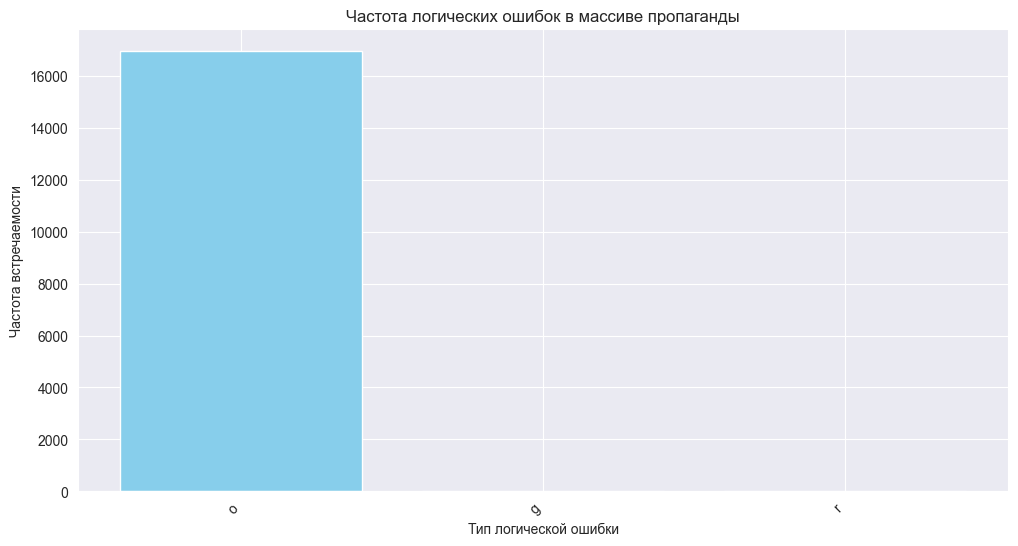

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from transformers import pipeline
from datasets import load_dataset
from transformers import AutoTokenizer

# 📌 1. Загружаем модель и токенизатор
pipe = pipeline("text-classification", model="./fallacy_bert", truncation=True, max_length=512)  # Обрезаем длинные тексты
tokenizer = AutoTokenizer.from_pretrained("./fallacy_bert")

# 📌 2. Загружаем .csv файл
file_path = "cleaned_bertopic_results.csv"  # Укажи путь к файлу
df = pd.read_csv(file_path)

# Проверяем структуру данных
print("🔹 Структура данных:")
print(df.head())

# 📌 3. Определяем колонку с текстами
if "text" not in df.columns:
    raise KeyError("Ошибка: в файле отсутствует столбец 'text'. Проверь формат данных.")

texts = df["text"].dropna().tolist()  # Удаляем пустые значения

# 📌 4. Проверяем длину текстов и удаляем слишком длинные
token_lengths = [len(tokenizer.tokenize(text)) for text in texts]
print(f"🔹 Самый длинный текст содержит {max(token_lengths)} токенов.")

texts = [text for text in texts if len(tokenizer.tokenize(text)) <= 512]

print(f"🔹 После фильтрации осталось {len(texts)} текстов.")

# 📌 5. Применяем модель к массиву пропаганды
print("🔹 Запускаем предсказания...")
predictions = pipe(texts)

# 📌 6. Загружаем оригинальные метки из Hugging Face датасета
dataset = load_dataset("benmshultz/RuFal_fallacy_detection")
label_list = list({label for example in dataset["train"] for label in example["labels"]})
id_to_label = {i: label for i, label in enumerate(label_list)}

# 📌 7. Связываем предсказания с реальными названиями логических ошибок
decoded_predictions = [
    {"label": id_to_label[int(pred["label"].split("_")[-1])], "score": pred["score"]}
    for pred in predictions
]

# 📌 8. Подсчитываем частоту логических ошибок
fallacy_counts = Counter([pred["label"] for pred in decoded_predictions])

print(f"🔹 Анализ завершён. Найдено {len(fallacy_counts)} типов логических ошибок.")

# 📌 9. Строим график частоты ошибок
plt.figure(figsize=(12, 6))
plt.bar(fallacy_counts.keys(), fallacy_counts.values(), color="skyblue")
plt.xlabel("Тип логической ошибки")
plt.ylabel("Частота встречаемости")
plt.title("Частота логических ошибок в массиве пропаганды")
plt.xticks(rotation=45, ha="right")
plt.show()

In [32]:
label_list = list(set(dataset["train"]["labels"]))  # Собираем все уникальные метки
id_to_label = {i: label for i, label in enumerate(label_list)}

In [33]:
print("🔹 Загруженные метки:", label_list)

🔹 Загруженные метки: ['faulty generalization', 'ad hominem', 'false dilemma', 'ad populum', 'appeal to emotion', 'circular claim', 'deductive fallacy', 'fallacy of relevance', 'intentional', 'fallacy of extension', 'equivocation', 'fallacy of credibility', 'false causality']


In [37]:
train_labels = dataset["train"]["labels"]  # Используем весь список меток
label_distribution = Counter([label for sublist in train_labels for label in sublist])  # Собираем статистику

In [38]:
print("🔹 Пример данных:", train_labels[:5])  # Показываем первые 5 записей

🔹 Пример данных: ['ad hominem', 'intentional', 'appeal to emotion', 'appeal to emotion', 'fallacy of relevance']


In [39]:
from collections import Counter

# Создаём список предсказанных меток
predicted_labels = [pred["label"] for pred in decoded_predictions]

# Подсчитываем количество встречаемости каждой ошибки
fallacy_counts = Counter(predicted_labels)

print("🔹 Частота ошибок:", fallacy_counts)

🔹 Частота ошибок: Counter({'o': 16941, 'g': 1, 'r': 1})


In [40]:
print(predictions[:10])  # Проверяем первые 10 предсказаний

[{'label': 'LABEL_12', 'score': 0.33841967582702637}, {'label': 'LABEL_12', 'score': 0.3691040873527527}, {'label': 'LABEL_12', 'score': 0.5176559686660767}, {'label': 'LABEL_12', 'score': 0.3262493312358856}, {'label': 'LABEL_12', 'score': 0.38355061411857605}, {'label': 'LABEL_12', 'score': 0.4555278420448303}, {'label': 'LABEL_12', 'score': 0.484481543302536}, {'label': 'LABEL_12', 'score': 0.3348318636417389}, {'label': 'LABEL_12', 'score': 0.5435285568237305}, {'label': 'LABEL_12', 'score': 0.36532625555992126}]


In [41]:
decoded_predictions = [
    {"label": id_to_label.get(int(pred["label"].split("_")[-1]), "UNKNOWN"), "score": pred["score"]}
    for pred in predictions
]

In [42]:
fallacy_counts = Counter([pred["label"] for pred in decoded_predictions])
print("🔹 Исправленный список ошибок:", fallacy_counts)

🔹 Исправленный список ошибок: Counter({'intentional': 16941, 'fallacy of extension': 1, 'appeal to emotion': 1})


In [44]:
predicted_labels = [pred["label"] for pred in decoded_predictions]
fallacy_counts = Counter(predicted_labels)

print("🔹 Частота ошибок в предсказаниях:", fallacy_counts)

🔹 Частота ошибок в предсказаниях: Counter({'intentional': 16941, 'fallacy of extension': 1, 'appeal to emotion': 1})


In [45]:
from collections import Counter

train_labels = [label for example in dataset["train"]["labels"] for label in example]
label_distribution = Counter(train_labels)

print("🔹 Частота ошибок в обучающем датасете:", label_distribution)

🔹 Частота ошибок в обучающем датасете: Counter({'a': 1025, 'n': 947, 'e': 871, 'l': 832, 'i': 802, 'o': 797, 't': 756, ' ': 625, 'f': 346, 'm': 279, 'c': 260, 'p': 256, 'y': 217, 'u': 147, 'd': 135, 's': 128, 'r': 123, 'v': 61, 'x': 58, 'h': 48, 'g': 39, 'z': 39, 'b': 23, 'q': 10})


In [47]:
fallacy_counts = Counter([pred["label"] for pred in decoded_predictions])
print("🔹 Исправленное распределение ошибок:", fallacy_counts)

🔹 Исправленное распределение ошибок: Counter({'intentional': 16941, 'fallacy of extension': 1, 'appeal to emotion': 1})


In [48]:
print([pred["label"] for pred in predictions[:20]])  # Проверяем первые 20 предсказаний

['LABEL_12', 'LABEL_12', 'LABEL_12', 'LABEL_12', 'LABEL_12', 'LABEL_12', 'LABEL_12', 'LABEL_12', 'LABEL_12', 'LABEL_12', 'LABEL_12', 'LABEL_12', 'LABEL_12', 'LABEL_12', 'LABEL_12', 'LABEL_12', 'LABEL_12', 'LABEL_12', 'LABEL_12', 'LABEL_12']


In [49]:
print(decoded_predictions[:20])  # Проверяем первые 20 преобразованных предсказаний

[{'label': 'intentional', 'score': 0.33841967582702637}, {'label': 'intentional', 'score': 0.3691040873527527}, {'label': 'intentional', 'score': 0.5176559686660767}, {'label': 'intentional', 'score': 0.3262493312358856}, {'label': 'intentional', 'score': 0.38355061411857605}, {'label': 'intentional', 'score': 0.4555278420448303}, {'label': 'intentional', 'score': 0.484481543302536}, {'label': 'intentional', 'score': 0.3348318636417389}, {'label': 'intentional', 'score': 0.5435285568237305}, {'label': 'intentional', 'score': 0.36532625555992126}, {'label': 'intentional', 'score': 0.37273404002189636}, {'label': 'intentional', 'score': 0.2796379625797272}, {'label': 'intentional', 'score': 0.3549475073814392}, {'label': 'intentional', 'score': 0.34115126729011536}, {'label': 'intentional', 'score': 0.3039286434650421}, {'label': 'intentional', 'score': 0.36531180143356323}, {'label': 'intentional', 'score': 0.41960763931274414}, {'label': 'intentional', 'score': 0.34358322620391846}, {'

In [50]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("./fallacy_bert")
token_lengths = [len(tokenizer.tokenize(text)) for text in texts]

print(f"🔹 Средняя длина токенизированных текстов: {sum(token_lengths) / len(token_lengths):.2f}")
print(f"🔹 Максимальная длина текста: {max(token_lengths)}")

🔹 Средняя длина токенизированных текстов: 164.23
🔹 Максимальная длина текста: 512


In [53]:
print("🔹 Все возможные метки:", id_to_label)

🔹 Все возможные метки: {0: 'ad hominem', 1: 'ad populum', 2: 'appeal to emotion', 3: 'circular claim', 4: 'deductive fallacy', 5: 'equivocation', 6: 'fallacy of credibility', 7: 'fallacy of extension', 8: 'fallacy of relevance', 9: 'false causality', 10: 'false dilemma', 11: 'faulty generalization', 12: 'intentional'}


In [55]:
print("🔹 Размер обучающего датасета:", len(dataset["train"]))

🔹 Размер обучающего датасета: 595


In [56]:
scores = [pred["score"] for pred in decoded_predictions]
print(f"🔹 Средний score: {sum(scores) / len(scores):.4f}")
print(f"🔹 Максимальный score: {max(scores)}")
print(f"🔹 Минимальный score: {min(scores)}")

🔹 Средний score: 0.3913
🔹 Максимальный score: 0.6314418911933899
🔹 Минимальный score: 0.13997644186019897


In [57]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model_name = "bert-base-multilingual-cased"  # Выбираем предобученную BERT-модель
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(label_list))
tokenizer = AutoTokenizer.from_pretrained(model_name)

C:\Users\yuter\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\yuter\.cache\huggingface\hub\models--bert-base-multilingual-cased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Some weights of Bert

In [59]:
train_dataset = dataset["train"]  # Просто используем train из dataset
train_dataset = train_dataset.map(tokenize_function)

Map: 100%|██████████| 595/595 [00:00<00:00, 2580.08 examples/s]


In [60]:
print(type(dataset["train"]))  # Должно вывести <class 'datasets.Dataset'>

<class 'datasets.arrow_dataset.Dataset'>


In [66]:
training_args = TrainingArguments(
    output_dir="./bert_finetuned",
    eval_strategy="no",  # Отключаем eval_strategy, если нет eval_dataset
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
)

In [69]:
def tokenize_function(example):
    return tokenizer(example["text"], truncation=True, padding="max_length", max_length=512)

train_dataset = dataset["train"]
train_dataset = train_dataset.map(tokenize_function)

# Проверяем, есть ли метки
print(train_dataset.column_names)  # Должно быть "labels"

Map: 100%|██████████| 595/595 [00:00<00:00, 2286.84 examples/s]

['labels', 'text', 'input_ids', 'token_type_ids', 'attention_mask']


In [71]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset
)

In [74]:
for key in ["input_ids", "attention_mask", "labels"]:
    print(f"🔹 {key}: {type(batch[key])}")

🔹 input_ids: <class 'list'>
🔹 attention_mask: <class 'list'>
🔹 labels: <class 'str'>


In [76]:
label_to_id = {v: k for k, v in id_to_label.items()}  # Переворачиваем словарь
train_dataset = train_dataset.map(lambda example: {"labels": label_to_id[example["labels"]]})

Map: 100%|██████████| 595/595 [00:00<00:00, 7628.13 examples/s]


In [77]:
print(train_dataset[0]["labels"])  # Должно вывести число (например, 3, 7, 10)

0


In [79]:
print(model.config)  # Должно быть что-то вроде `num_labels=13`

BertConfig {
  "_attn_implementation_autoset": true,
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8",
    "9": "LABEL_9",
    "10": "LABEL_10",
    "11": "LABEL_11",
    "12": "LABEL_12"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_10": 10,
    "LABEL_11": 11,
    "LABEL_12": 12,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5,
    "LABEL_6": 6,
    "LABEL_7": 7,
    "LABEL_8": 8,
    "LABEL_9": 9
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_h

In [80]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(
    "bert-base-multilingual-cased",
    num_labels=len(label_list)  # Задаём количество классов ошибок
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [81]:
print(model.config.num_labels)  # Должно вывести `13` (или другое количество классов)

13


In [84]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(
    "bert-base-multilingual-cased",
    num_labels=len(label_list)  # Указываем число классов
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [86]:
label_to_id = {v: k for k, v in id_to_label.items()}  # Переворачиваем словарь
train_dataset = train_dataset.map(lambda example: {"labels": label_to_id.get(example["labels"], -1)})  # Используем .get(), чтобы избежать KeyError

Map: 100%|██████████| 595/595 [00:00<00:00, 13837.37 examples/s]


In [89]:
print(set(example["labels"] for example in train_dataset))

{-1}


In [90]:
train_dataset = train_dataset.map(lambda example: {"labels": label_to_id.get(example["labels"], "UNKNOWN")})

Map: 100%|██████████| 595/595 [00:00<00:00, 9594.41 examples/s]


In [92]:
print(train_dataset.column_names)  # Должно включать "labels"

['labels', 'text', 'input_ids', 'token_type_ids', 'attention_mask']


In [93]:
train_dataset = train_dataset.map(lambda example: {"labels": label_to_id.get(example["labels"], -1)})

Map: 100%|██████████| 595/595 [00:00<00:00, 5041.07 examples/s]


In [95]:
print(model.config)  # Должно включать "num_labels"

BertConfig {
  "_attn_implementation_autoset": true,
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8",
    "9": "LABEL_9",
    "10": "LABEL_10",
    "11": "LABEL_11",
    "12": "LABEL_12"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_10": 10,
    "LABEL_11": 11,
    "LABEL_12": 12,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5,
    "LABEL_6": 6,
    "LABEL_7": 7,
    "LABEL_8": 8,
    "LABEL_9": 9
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_h

In [97]:
train_dataset = train_dataset.filter(lambda example: example["labels"] in label_to_id.values())

Filter: 100%|██████████| 595/595 [00:00<00:00, 1555.97 examples/s]


In [102]:
print("🔹 label_to_id:", label_to_id)
print("🔹 Метки в train_dataset:", set(example["labels"] for example in dataset["train"]))

🔹 label_to_id: {'ad hominem': 0, 'ad populum': 1, 'appeal to emotion': 2, 'circular claim': 3, 'deductive fallacy': 4, 'equivocation': 5, 'fallacy of credibility': 6, 'fallacy of extension': 7, 'fallacy of relevance': 8, 'false causality': 9, 'false dilemma': 10, 'faulty generalization': 11, 'intentional': 12}
🔹 Метки в train_dataset: {'faulty generalization', 'ad hominem', 'false dilemma', 'ad populum', 'appeal to emotion', 'circular claim', 'deductive fallacy', 'fallacy of relevance', 'intentional', 'fallacy of extension', 'equivocation', 'fallacy of credibility', 'false causality'}


In [104]:
train_dataset = train_dataset.filter(lambda example: example["labels"] != -1)

In [105]:
for example in train_dataset:
    if example["labels"] == -1:
        print("❌ Ошибка: метка -1 найдена!", example)

In [107]:
count_invalid = sum(1 for example in train_dataset if example["labels"] == -1)
print(f"❌ Осталось {count_invalid} примеров с -1")

❌ Осталось 0 примеров с -1


In [109]:
train_dataset = train_dataset.map(lambda example: {"labels": max(example["labels"], 0)})  # -1 → 0

In [112]:
train_dataset = train_dataset.map(lambda example: {"labels": label_to_id.get(example["labels"], 0)})  # `-1` → `0`

In [117]:
train_dataset = dataset["train"].map(lambda example: {"labels": label_to_id.get(example["labels"], 0), **example})

Map: 100%|██████████| 595/595 [00:00<00:00, 6997.76 examples/s]


In [129]:
print(label_to_id)

{'ad hominem': 0, 'ad populum': 1, 'appeal to emotion': 2, 'circular claim': 3, 'deductive fallacy': 4, 'equivocation': 5, 'fallacy of credibility': 6, 'fallacy of extension': 7, 'fallacy of relevance': 8, 'false causality': 9, 'false dilemma': 10, 'faulty generalization': 11, 'intentional': 12}


In [145]:
print(label_to_id)  # Должен содержать {'ad hominem': 0, 'false dilemma': 1, ...}
print(set(example["labels"] for example in train_dataset))  # Должны быть только числа от `0` до `num_labels - 1`

{'ad hominem': 0, 'ad populum': 1, 'appeal to emotion': 2, 'circular claim': 3, 'deductive fallacy': 4, 'equivocation': 5, 'fallacy of credibility': 6, 'fallacy of extension': 7, 'fallacy of relevance': 8, 'false causality': 9, 'false dilemma': 10, 'faulty generalization': 11, 'intentional': 12}
{'faulty generalization', 'ad hominem', 'false dilemma', 'ad populum', 'appeal to emotion', 'circular claim', 'deductive fallacy', 'fallacy of relevance', 'intentional', 'fallacy of extension', 'equivocation', 'fallacy of credibility', 'false causality'}


In [140]:
model.config.num_labels = len(label_to_id)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset
)

In [144]:
train_dataset = train_dataset.map(lambda example: {"labels": label_to_id[example["labels"]], **example})

Map: 100%|██████████| 595/595 [00:00<00:00, 9596.47 examples/s]


In [147]:
def convert_labels(example):
    if example["labels"] in label_to_id:
        new_label = label_to_id[example["labels"]]
        print(f"✅ Конвертация: {example['labels']} → {new_label}")  # Выводим замену
        return {"labels": new_label, **example}
    else:
        print(f"❌ Ошибка: {example['labels']} не найдено в `label_to_id`")
        return example  # Оставляем без изменений, чтобы увидеть, что происходит

train_dataset = train_dataset.map(convert_labels)

Map: 100%|██████████| 595/595 [00:00<00:00, 18030.31 examples/s]

✅ Конвертация: ad hominem → 0
✅ Конвертация: intentional → 12
✅ Конвертация: appeal to emotion → 2
✅ Конвертация: appeal to emotion → 2
✅ Конвертация: fallacy of relevance → 8
✅ Конвертация: fallacy of relevance → 8
✅ Конвертация: false dilemma → 10
✅ Конвертация: ad hominem → 0
✅ Конвертация: intentional → 12
✅ Конвертация: appeal to emotion → 2
✅ Конвертация: ad populum → 1
✅ Конвертация: intentional → 12
✅ Конвертация: ad populum → 1
✅ Конвертация: appeal to emotion → 2
✅ Конвертация: fallacy of relevance → 8
✅ Конвертация: ad hominem → 0
✅ Конвертация: appeal to emotion → 2
✅ Конвертация: intentional → 12
✅ Конвертация: faulty generalization → 11
✅ Конвертация: fallacy of extension → 7
✅ Конвертация: intentional → 12
✅ Конвертация: intentional → 12
✅ Конвертация: fallacy of extension → 7
✅ Конвертация: appeal to emotion → 2
✅ Конвертация: ad hominem → 0
✅ Конвертация: ad populum → 1
✅ Конвертация: fallacy of relevance → 8
✅ Конвертация: intentional → 12
✅ Конвертация: ad hominem → 

In [152]:
from datasets import DatasetDict

dataset_new = DatasetDict({
    "train": train_dataset.map(lambda example: {"labels": label_to_id[example["labels"]], **example})
})

print(set(example["labels"] for example in dataset_new["train"]))  # Должны быть только числа

Map: 100%|██████████| 595/595 [00:00<00:00, 21249.01 examples/s]

{'faulty generalization', 'ad hominem', 'false dilemma', 'ad populum', 'appeal to emotion', 'circular claim', 'deductive fallacy', 'fallacy of relevance', 'intentional', 'fallacy of extension', 'equivocation', 'fallacy of credibility', 'false causality'}


In [158]:
from datasets import Value

# ШАГ 1: Создаём новый столбец с числовыми метками.
def convert_labels(example):
    # Если метка хранится в списке, возьмём первый элемент (или продумайте логику для множества меток)
    label_str = example["labels"][0] if isinstance(example["labels"], list) else example["labels"]
    # Возвращаем новый столбец "int_labels" с числовым значением
    return {"int_labels": label_to_id[label_str]}

# Применяем map и записываем в новый датасет
train_dataset_new = train_dataset.map(convert_labels, batched=False)

# ШАГ 2: Удаляем старый столбец "labels" и переименовываем "int_labels" в "labels"
train_dataset_new = train_dataset_new.remove_columns("labels")
train_dataset_new = train_dataset_new.rename_column("int_labels", "labels")

# ШАГ 3: Приводим столбец "labels" к типу int (int64)
train_dataset_new = train_dataset_new.cast_column("labels", Value("int64"))

# Проверяем, что в датасете теперь только числа
print(set(example["labels"] for example in train_dataset_new))

Casting the dataset: 100%|██████████| 595/595 [00:00<00:00, 31318.06 examples/s]

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}


In [180]:
def tokenize_function(example):
    # Здесь можно настроить truncation, padding и max_length по необходимости.
    return tokenizer(example["text"], truncation=True, padding="max_length", max_length=128)

# Применяем токенизацию ко всему датасету.
tokenized_dataset = train_dataset.map(tokenize_function, batched=True)

Map: 100%|██████████| 595/595 [00:00<00:00, 6165.35 examples/s]


In [181]:
def convert_labels(example):
    # Если метка оказалась списком – берём первый элемент
    label_str = example["labels"][0] if isinstance(example["labels"], list) else example["labels"]
    return {"int_labels": label_to_id[label_str]}

# Применяем map для создания нового числового столбца
tokenized_dataset = tokenized_dataset.map(convert_labels)

Map: 100%|██████████| 595/595 [00:00<00:00, 15658.64 examples/s]


In [182]:
# Это должно вывести соответствующие числовые значения, например, {0, 1, ...}
print(set(example["int_labels"] for example in tokenized_dataset))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}


In [183]:
# Удаляем старую колонку "labels"
tokenized_dataset = tokenized_dataset.remove_columns("labels")
# Переименовываем "int_labels" → "labels"
tokenized_dataset = tokenized_dataset.rename_column("int_labels", "labels")

In [184]:
from datasets import Value
tokenized_dataset = tokenized_dataset.cast_column("labels", Value("int64"))

Casting the dataset: 100%|██████████| 595/595 [00:00<00:00, 45770.03 examples/s]


In [185]:
for example in tokenized_dataset.select(range(5)):
    print(type(example["labels"]), example["labels"])  # Должны быть int

<class 'int'> 0
<class 'int'> 12
<class 'int'> 2
<class 'int'> 2
<class 'int'> 8


In [193]:
from datasets import Value
from transformers import AutoTokenizer

# Пример словаря меток
label_to_id = {
    'ad hominem': 0,
    'ad populum': 1,
    'appeal to emotion': 2,
    'circular claim': 3,
    'deductive fallacy': 4,
    'equivocation': 5,
    'fallacy of credibility': 6,
    'fallacy of extension': 7,
    'fallacy of relevance': 8,
    'false causality': 9,
    'false dilemma': 10,
    'faulty generalization': 11,
    'intentional': 12,
}

# Инициализируем токенизатор (замените на нужную модель)
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

# --- Шаг 1. Токенизация текста ---
def tokenize_function(example):
    # Токенизируем текст: включаем truncation, padding и задаём max_length по необходимости
    return tokenizer(example["text"], truncation=True, padding="max_length", max_length=128)

# Применяем токенизацию ко всему датасету (предполагается, что train_dataset уже загружен)
tokenized_dataset = train_dataset.map(tokenize_function, batched=True)

# --- Шаг 2. Преобразование меток ---
def convert_labels(example):
    # Если labels — это список, возьмем первый элемент
    label_value = example["labels"]
    if isinstance(label_value, list):
        label_value = label_value[0]
    # Преобразуем строку метки в число с помощью словаря label_to_id
    return {"int_labels": label_to_id[label_value]}

# Создаем новый столбец "int_labels" с числовыми значениями
tokenized_dataset = tokenized_dataset.map(convert_labels)

# --- Шаг 3. Удаление оригинального столбца и переименование ---
# Удаляем старую колонку с метками (строковой)
tokenized_dataset = tokenized_dataset.remove_columns("labels")
# Переименовываем "int_labels" в "labels"
tokenized_dataset = tokenized_dataset.rename_column("int_labels", "labels")

# --- Шаг 4. Приведение типа столбца ---
# Приводим колонку "labels" к типу int64
tokenized_dataset = tokenized_dataset.cast_column("labels", Value("int64"))

# --- Шаг 5. Установка формата для PyTorch ---
# Задаем список колонок, которые необходимы модели.
columns_to_use = ["input_ids", "attention_mask", "labels"]
# Если токенизатор возвращает token_type_ids — добавим сюда
if "token_type_ids" in tokenized_dataset.column_names:
    columns_to_use.append("token_type_ids")

# Очень важно: вызываем set_format без переприсваивания!
tokenized_dataset.set_format("torch", columns=columns_to_use)

# --- Проверка схемы ---
print("Column names:", tokenized_dataset.column_names)
print("Features:", tokenized_dataset.features)

C:\Users\yuter\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\yuter\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Casting the dataset: 100%|█████

Column names: ['text', 'input_ids', 'token_type_ids', 'attention_mask', 'labels']
Features: {'text': Value(dtype='string', id=None), 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None), 'token_type_ids': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None), 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None), 'labels': Value(dtype='int64', id=None)}


In [11]:
# 1. Импорты
from datasets import load_dataset, Value
from transformers import AutoTokenizer, BertForSequenceClassification, Trainer, TrainingArguments

# 2. Загрузка CSV-файлов с данными
data_files = {
    "train": "https://huggingface.co/datasets/benmshultz/RuFal_fallacy_detection/resolve/main/fallacies_ru_train.csv",
    "eval": "https://huggingface.co/datasets/benmshultz/RuFal_fallacy_detection/resolve/main/fallacies_ru_test.csv"
}
raw_datasets = load_dataset("csv", data_files=data_files)

# 3. Определение словаря меток (label_to_id)
label_to_id = {
    'ad hominem': 0,
    'ad populum': 1,
    'appeal to emotion': 2,
    'circular claim': 3,
    'deductive fallacy': 4,
    'equivocation': 5,
    'fallacy of credibility': 6,
    'fallacy of extension': 7,
    'fallacy of relevance': 8,
    'false causality': 9,
    'false dilemma': 10,
    'faulty generalization': 11,
    'intentional': 12,
}

# 4. Инициализация токенизатора (русскоязычный)
tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")

# 5. Функция токенизации
def tokenize_function(example):
    return tokenizer(
        example["text"],
        truncation=True,
        padding="max_length",
        max_length=128
    )

# Токенизируем тренировочный и eval наборы
tokenized_train = raw_datasets["train"].map(tokenize_function, batched=True)
tokenized_eval = raw_datasets["eval"].map(tokenize_function, batched=True)

# 6. Функция преобразования меток из строк в числа
def convert_labels(example):
    label_val = example["labels"]
    if isinstance(label_val, list):
        label_val = label_val[0]
    return {"int_labels": label_to_id[label_val]}

tokenized_train = tokenized_train.map(convert_labels)
tokenized_eval = tokenized_eval.map(convert_labels)

# 7. Удаляем исходный столбец "labels" (строкового типа) и переименовываем новый числовой столбец
tokenized_train = tokenized_train.remove_columns("labels")
tokenized_train = tokenized_train.rename_column("int_labels", "labels")

tokenized_eval = tokenized_eval.remove_columns("labels")
tokenized_eval = tokenized_eval.rename_column("int_labels", "labels")

# 8. Приводим колонку "labels" к типу int64
tokenized_train = tokenized_train.cast_column("labels", Value("int64"))
tokenized_eval = tokenized_eval.cast_column("labels", Value("int64"))

# 9. Устанавливаем формат датасета для PyTorch (метод set_format мутирует датасет "на месте")
columns_to_use = ["input_ids", "attention_mask", "labels"]
if "token_type_ids" in tokenized_train.column_names:
    columns_to_use.append("token_type_ids")
tokenized_train.set_format("torch", columns=columns_to_use)
tokenized_eval.set_format("torch", columns=columns_to_use)

# Проверка схемы, можно вывести:
print("Train columns:", tokenized_train.column_names)
print("Train features:", tokenized_train.features)
print("Eval columns:", tokenized_eval.column_names)
print("Eval features:", tokenized_eval.features)

# 10. Инициализируем модель
model = BertForSequenceClassification.from_pretrained(
    "DeepPavlov/rubert-base-cased",
    num_labels=len(label_to_id)
)

# 11. Определяем аргументы обучения (legacy-параметры для старых версий transformers)
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    eval_strategy="epoch",      # Для новых версий это evaluation_strategy
    logging_strategy="epoch",
    save_strategy="epoch",
    logging_steps=50,
    save_steps=2000,
    eval_steps=10,
    learning_rate=2e-5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss"
)

# 12. Создаем Trainer, передаём в него тренировочную и eval выборки
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_eval
)

# 13. Запускаем обучение
trainer.train()

Generating train split: 595 examples [00:00, 24786.32 examples/s]
Generating eval split: 105 examples [00:00, 5416.93 examples/s]
Casting the dataset: 100%|██████████| 105/105 [00:00<00:00, 6598.57 examples/s]


Train columns: ['text', 'input_ids', 'token_type_ids', 'attention_mask', 'labels']
Train features: {'text': Value(dtype='string', id=None), 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None), 'token_type_ids': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None), 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None), 'labels': Value(dtype='int64', id=None)}
Eval columns: ['text', 'input_ids', 'token_type_ids', 'attention_mask', 'labels']
Eval features: {'text': Value(dtype='string', id=None), 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None), 'token_type_ids': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None), 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None), 'labels': Value(dtype='int64', id=None)}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\yuter\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss
1,2.296400,2.303074
2,2.147700,2.280843
3,2.040600,2.244665


C:\Users\yuter\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\yuter\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


TrainOutput(global_step=225, training_loss=2.1615662299262155, metrics={'train_runtime': 767.0028, 'train_samples_per_second': 2.327, 'train_steps_per_second': 0.293, 'total_flos': 117424904728320.0, 'train_loss': 2.1615662299262155, 'epoch': 3.0})

In [12]:
model.save_pretrained("./saved_model")
tokenizer.save_pretrained("./saved_model")

('./saved_model\\tokenizer_config.json',
 './saved_model\\special_tokens_map.json',
 './saved_model\\vocab.txt',
 './saved_model\\added_tokens.json',
 './saved_model\\tokenizer.json')

intentional    17982
No fallacy        10
Name: predicted_fallacy, dtype: int64


C:\Users\yuter\AppData\Local\Temp\ipykernel_17104\2964367881.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fallacy_counts.index, y=fallacy_counts.values, palette="viridis")


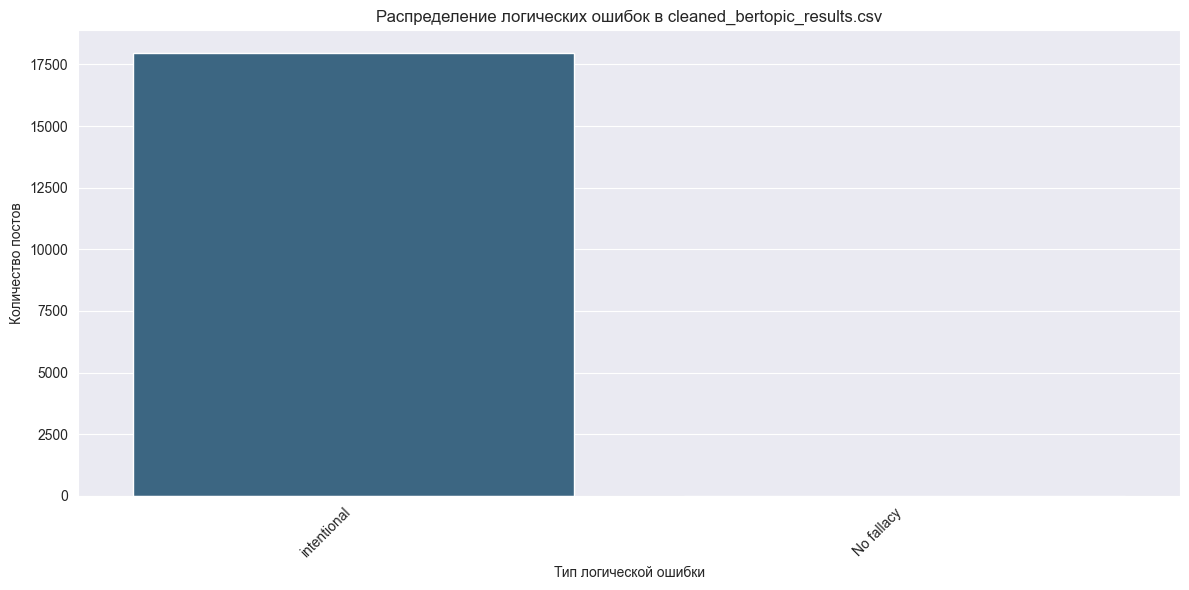

In [14]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns

# Предполагается, что у вас уже определены следующие переменные (из предыдущего этапа):
# model – обученная модель (на основе DeepPavlov/rubert-base-cased) для классификации fallacy.
# tokenizer – соответствующий токенизатор.
# label_to_id – словарь, преобразующий строковые метки в числовые.
#
# Создаем инвертированный словарь для преобразования id в название логической ошибки:
id_to_label = {v: k for k, v in label_to_id.items()}

# Функция предсказания с учетом margin (пороговой разницы между 1-й и 2-й вероятностью)
def predict_fallacy_margin(text, margin_threshold=0.1):
    """
    Выполняет предсказание fallacy для текста.
    Если разница между первой и второй по величине вероятностями (после softmax) < margin_threshold,
    функция возвращает "No fallacy".
    """
    # Токенизируем текст (аналогично обучению, с усечением и паддингом)
    inputs = tokenizer(
        text,
        truncation=True,
        padding="max_length",
        max_length=128,
        return_tensors="pt"
    )
    # Переводим входы на устройство модели (CPU/GPU)
    inputs = {k: v.to(model.device) for k, v in inputs.items()}

    model.eval()
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits  # размерность [1, num_labels]
        probabilities = torch.softmax(logits, dim=-1)  # расчет вероятностей
        # Сортируем вероятности по убыванию
        sorted_probs, sorted_indices = torch.sort(probabilities, descending=True, dim=1)
        diff = sorted_probs[0, 0] - sorted_probs[0, 1]

    if diff < margin_threshold:
        return "No fallacy"
    else:
        return id_to_label[sorted_indices[0, 0].item()]

# Загружаем CSV-файл с телеграм-постами (убедитесь, что в файле есть столбец "text")
df = pd.read_csv("cleaned_bertopic_results.csv")

# Применяем функцию предсказания с выбранным порогом margin (например, 0.1, можно экспериментировать)
df["predicted_fallacy"] = df["text"].apply(lambda x: predict_fallacy_margin(x, margin_threshold=0.1))

# Выведем распределение предсказаний
fallacy_counts = df["predicted_fallacy"].value_counts()
print(fallacy_counts)

# Строим график распределения
plt.figure(figsize=(12, 6))
sns.barplot(x=fallacy_counts.index, y=fallacy_counts.values, palette="viridis")
plt.xlabel("Тип логической ошибки")
plt.ylabel("Количество постов")
plt.title("Распределение логических ошибок в cleaned_bertopic_results.csv")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

C:\Users\yuter\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\yuter\AppData\Local\Temp\ipykernel_26712\3587576560.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=distribution, palette="viridis")


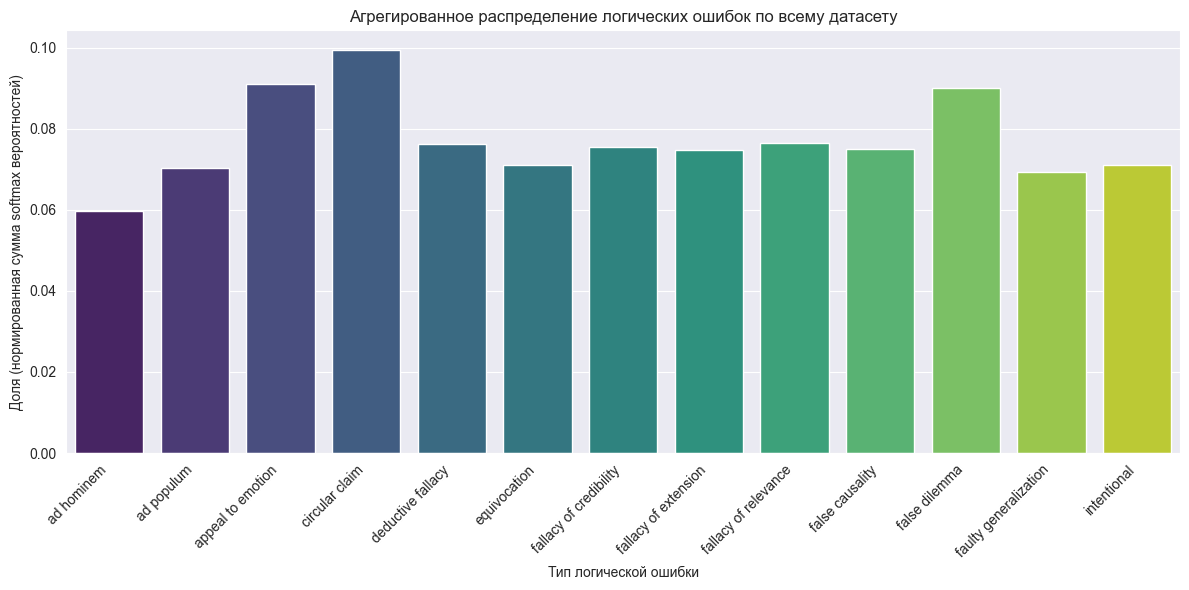

In [2]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer, BertForSequenceClassification

# 1. Определение словаря меток (label_to_id)
label_to_id = {
    'ad hominem': 0,
    'ad populum': 1,
    'appeal to emotion': 2,
    'circular claim': 3,
    'deductive fallacy': 4,
    'equivocation': 5,
    'fallacy of credibility': 6,
    'fallacy of extension': 7,
    'fallacy of relevance': 8,
    'false causality': 9,
    'false dilemma': 10,
    'faulty generalization': 11,
    'intentional': 12,
}

# Инвертированный словарь для преобразования id в название логической ошибки:
id_to_label = {v: k for k, v in label_to_id.items()}

# 2. Загрузка модели и токенизатора
tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")
model = BertForSequenceClassification.from_pretrained("DeepPavlov/rubert-base-cased", num_labels=len(label_to_id))
model.eval()  # перевод модели в режим оценки

# Определяем устройство (GPU, если доступно)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 3. Загрузка датасета с текстами
df = pd.read_csv("cleaned_bertopic_results.csv")

# 4. Агрегация softmax‑вероятностей по всем постам
num_labels = len(label_to_id)
aggregate_probs = np.zeros(num_labels, dtype=np.float64)

with torch.no_grad():
    for text in df["text"]:
        # Токенизация текста (усечение, паддинг до max_length=128)
        inputs = tokenizer(
            text,
            truncation=True,
            padding="max_length",
            max_length=128,
            return_tensors="pt"
        )
        # Переносим данные на устройство модели (GPU или CPU)
        inputs = {k: v.to(device) for k, v in inputs.items()}
        outputs = model(**inputs)
        logits = outputs.logits  # размер [1, num_labels]
        probabilities = torch.softmax(logits, dim=-1).squeeze(0)  # размер [num_labels]
        aggregate_probs += probabilities.cpu().numpy()

# 5. Нормализация: получаем доли от суммы
total = aggregate_probs.sum()
distribution = aggregate_probs / total

# 6. Подготовка меток для графика (сортировка по порядку id)
labels = [id_to_label[i] for i in range(num_labels)]

# 7. Построение графика распределения
plt.figure(figsize=(12, 6))
sns.barplot(x=labels, y=distribution, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Тип логической ошибки")
plt.ylabel("Доля (нормированная сумма softmax вероятностей)")
plt.title("Агрегированное распределение логических ошибок по всему датасету")
plt.tight_layout()
plt.show()

C:\Users\yuter\AppData\Local\Temp\ipykernel_26712\2505354842.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_distribution, x='Fallacy', y='Distribution', palette='viridis')


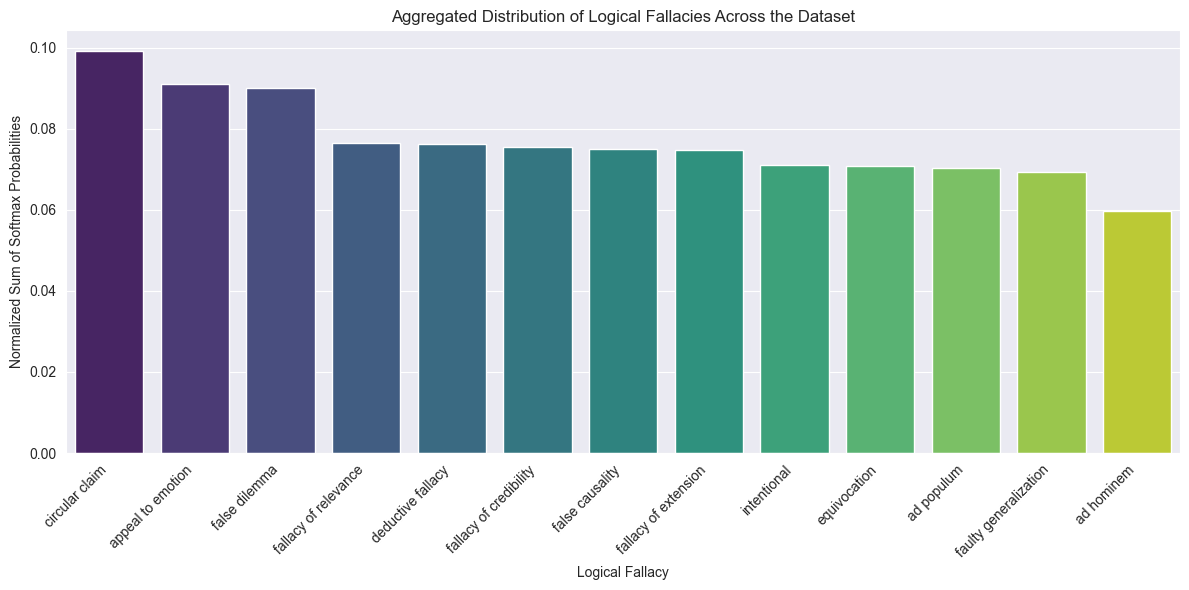

In [3]:
import pandas as pd

# Создаем DataFrame с fallacy и соответствующей долей
df_distribution = pd.DataFrame({'Fallacy': labels, 'Distribution': distribution})
# Сортируем по столбцу Distribution от большего к меньшему
df_distribution = df_distribution.sort_values(by='Distribution', ascending=False)

# Построение графика
plt.figure(figsize=(12, 6))
sns.barplot(data=df_distribution, x='Fallacy', y='Distribution', palette='viridis')
plt.xticks(rotation=45, ha="right")
plt.xlabel("Logical Fallacy")
plt.ylabel("Normalized Sum of Softmax Probabilities")
plt.title("Aggregated Distribution of Logical Fallacies Across the Dataset")
plt.tight_layout()
plt.show()